In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib  import * 
from scipy import stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train = pd.read_csv("DataTrained/medical_cost_insurance.csv")

In [3]:
df_train.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df_train.shape

(1338, 7)

### checking for duplicates

In [5]:
df_train.duplicated().any()

True

In [6]:
def dup_rows_index(df_train):
  dup = df_train[df_train.duplicated()]
  print('Duplicated index loc:',dup[dup == True ].index.tolist())
  return dup

In [7]:
dup_rows_index(df_train)

Duplicated index loc: [581]


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


### Deleting of duplicate data

In [8]:
df_train = df_train.drop_duplicates()

In [9]:
df_train.duplicated().any()

False

In [10]:
df_train.shape

(1337, 7)

### checking for null values


In [11]:
df_train.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='charges', ylabel='Density'>

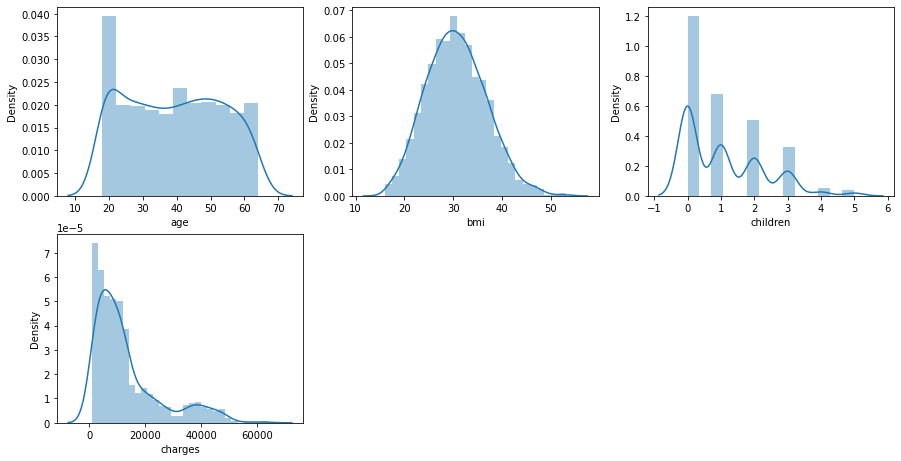

In [12]:
plt.figure(figsize=(15,16))

plt.subplot(4, 3, 1)
sns.distplot(df_train['age'])

plt.subplot(4, 3, 2)
sns.distplot(df_train['bmi'])

plt.subplot(4, 3, 3)
sns.distplot(df_train['children'])

plt.subplot(4, 3, 4)
sns.distplot(df_train['charges'])

In [13]:
df_train['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:xlabel='region', ylabel='count'>

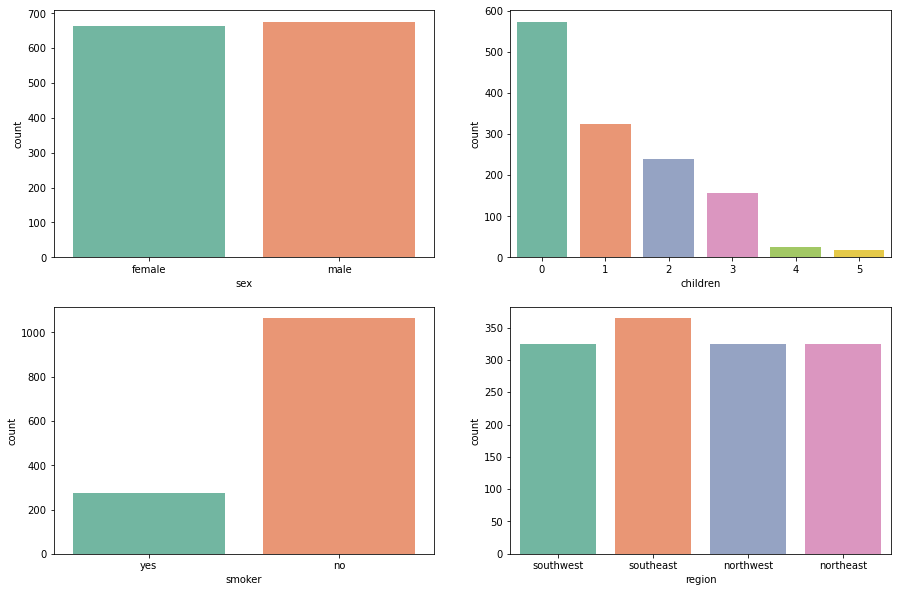

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.countplot(data = df_train, x = 'sex', palette='Set2' )

plt.subplot(2,2,2)
sns.countplot( data = df_train, x = 'children', palette='Set2')

plt.subplot(2,2,3)
sns.countplot(data = df_train, x = 'smoker', palette='Set2')

plt.subplot(2,2,4)
sns.countplot(data = df_train, x = 'region', palette='Set2')

Observing the above graphs we can see that we have practically the same number between men and women

The more the number of children, the less values we have, with the highest value people who do not have any children

when we look at the smoker variable we can see that most of our base is non-smokers 

we can see that regions are equally distributed.

In [15]:
print(df_train['sex'].value_counts())

print('\n',df_train['children'].value_counts())

print('\n',df_train['smoker'].value_counts())

print('\n',df_train['region'].value_counts())

male      675
female    662
Name: sex, dtype: int64

 0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

 no     1063
yes     274
Name: smoker, dtype: int64

 southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


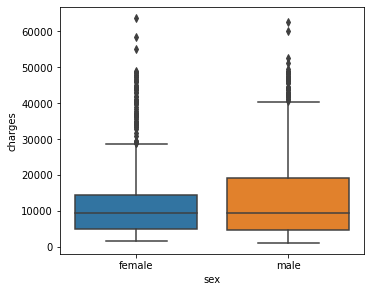

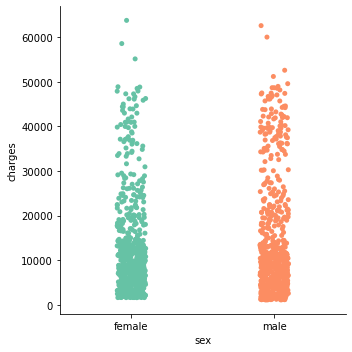

In [16]:
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.boxplot(x='sex', y='charges', data= df_train)


sns.catplot(data = df_train, x = 'sex', y = 'charges', palette = 'Set2')


##### We can see from above plot that for both male and female charges for health insurance are almost similar.

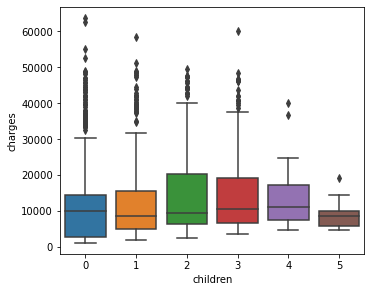

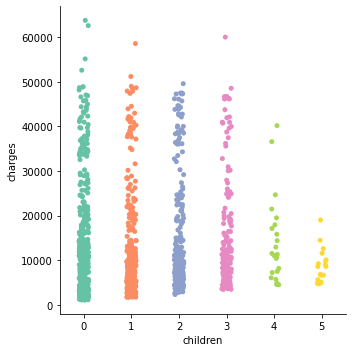

In [17]:
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.boxplot(x='children', y='charges', data= df_train)


sns.catplot(data = df_train, x = 'children', y = 'charges', palette = 'Set2')

##### From the above plot we can see that  people who have 5 children pay less charges than others and the people with 0 children pay high charges for health insurance.

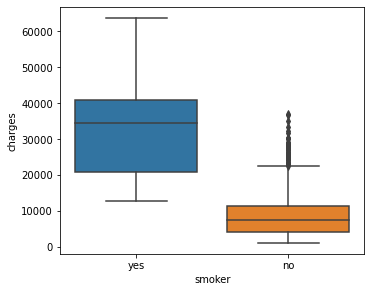

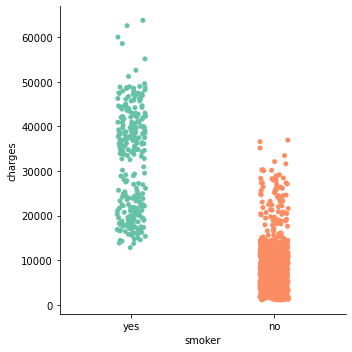

In [18]:
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.boxplot(x='smoker', y='charges', data= df_train)

sns.catplot(data = df_train, x = 'smoker', y = 'charges', palette = 'Set2')

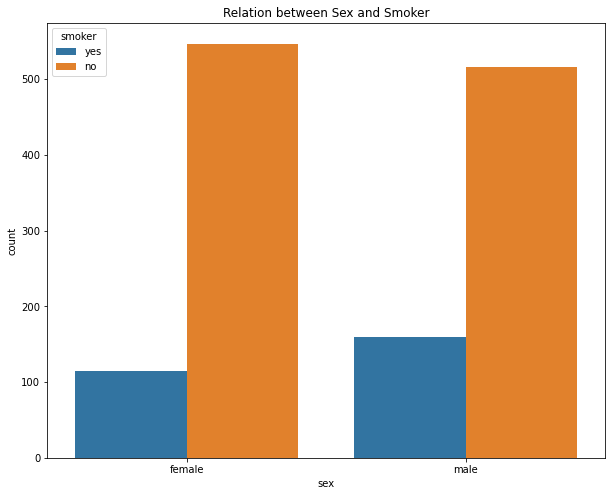

In [19]:
plt.figure(figsize=(10,8))
plt.title("Relation between Sex and Smoker")
sns.countplot(data=df_train, x='sex', hue='smoker')
plt.show()

###### Males tend to smoke more as compared to females.

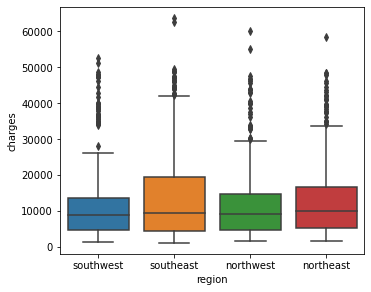

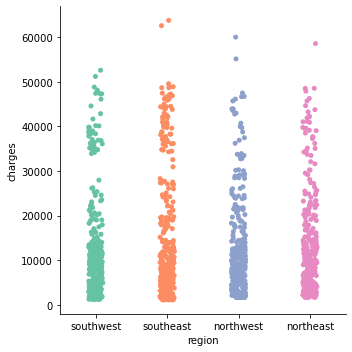

In [20]:
plt.figure(figsize= (12,10))

plt.subplot(2,2,1)
sns.boxplot(x='region', y='charges', data= df_train)

sns.catplot(data = df_train, x = "region", y = "charges", palette = "Set2")

There is no significant impact of region on charges attribute, it is evenly distributed.

# Null Hypothesis : Does bmi of males differ significantly from that of females

##### Understanding difference between bmi of male vs female with respect to their age.


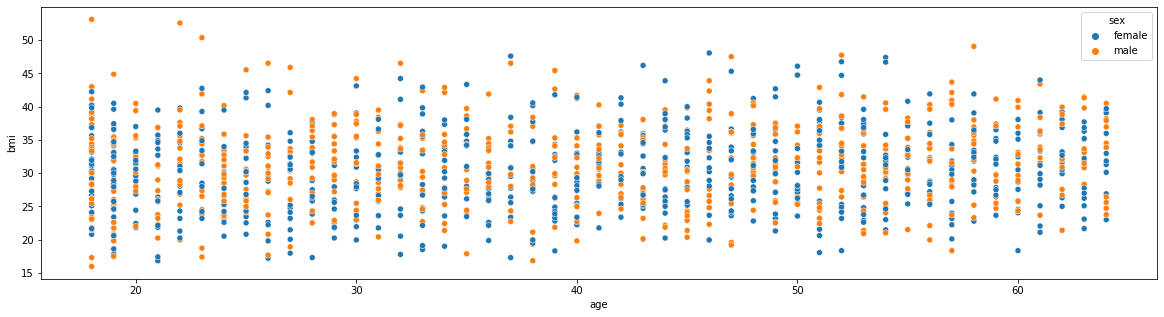

In [21]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='age',y='bmi',hue='sex',data=df_train)
plt.show()

### T-test to analyse the effect of male and female on the bmi

In [22]:
x = np.array(df_train[df_train.sex == 'male'].bmi) 
y = np.array(df_train[df_train.sex == 'female'].bmi)

# Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

### if p value is less than 0.05 we reject  null hypothesis.

In [23]:
if p_value>0.05:
  print("p value is",p_value,",hence we accept null hypothesis so the bmi of males not differ significantly from that of females"  )
else:
  print("p value is",p_value,",hence we reject null hypothesis so the bmi of males differ significantly from that of females")


p value is 0.08991704324931137 ,hence we accept null hypothesis so the bmi of males not differ significantly from that of females


# Null Hypothesis : Do charges of people who smoke differ significantly from the people who don't?

##### understanding difference between charges paid by customers who smoke vs non smoker with respect to their age.


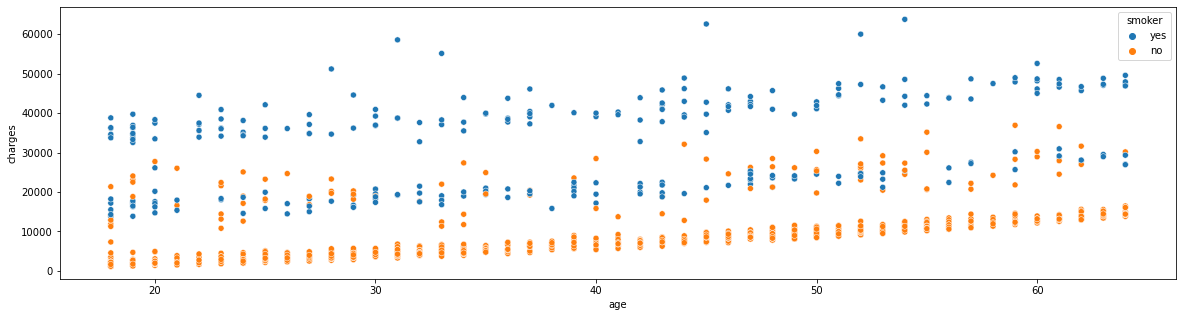

In [24]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='age',y='charges',hue='smoker',data=df_train)
plt.show()

### T-test to analyse the effect of smoking on the charges

In [25]:
x = np.array(df_train[df_train.smoker == 'yes'].charges) 
y = np.array(df_train[df_train.smoker == 'no'].charges)

# Independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

### if p value is less than 0.05 we reject  null hypothesis.

In [26]:
if p_value>0.05:
  print("p value is",p_value,",hence we accept null hypothesis so the charges paid by smoker and non-smoker are same"  )
else:
  print("p value is",p_value,",hence we reject null hypothesis so the charges paid by smoker and non-smoker are different")

p value is 1.4067220949376498e-282 ,hence we reject null hypothesis so the charges paid by smoker and non-smoker are different


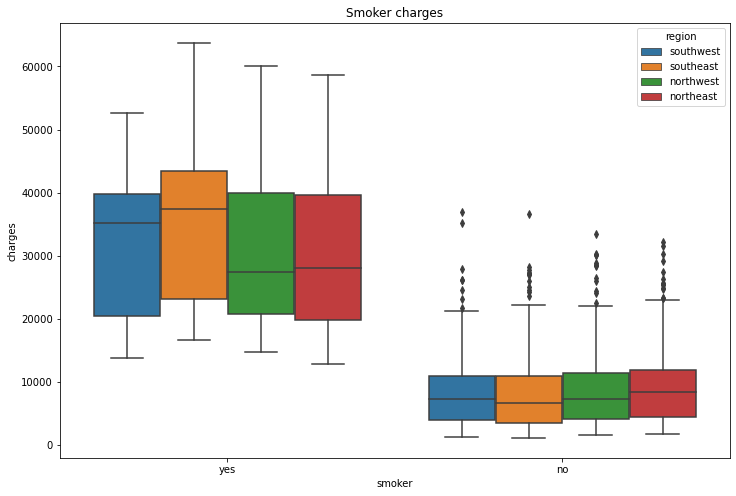

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_train, x='smoker', y='charges', hue= 'region')
plt.title('Smoker charges')
plt.show()

[]

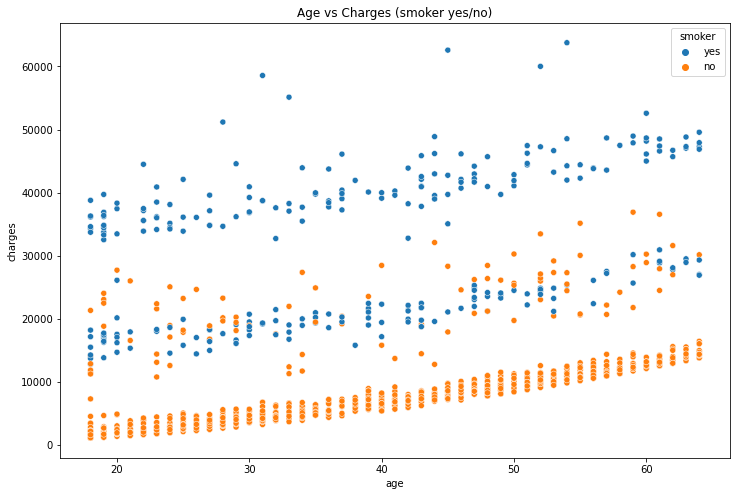

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_train, x='age', y='charges', hue='smoker')
plt.title('Age vs Charges (smoker yes/no)')
plt.plot()

We can clearly see a distintion of charges vs age, for someone that doesn't smoke and someone who smokes

[]

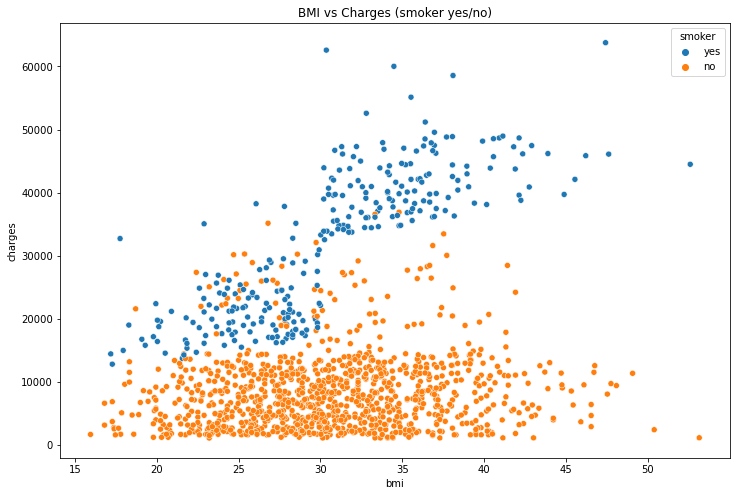

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_train, x='bmi', y='charges', hue='smoker')
plt.title('BMI vs Charges (smoker yes/no)')
plt.plot()

From the above plot we can conclude that a higher bmi doesn't mean a higher charges.Although again if a person smokes, there is a clear distinction.

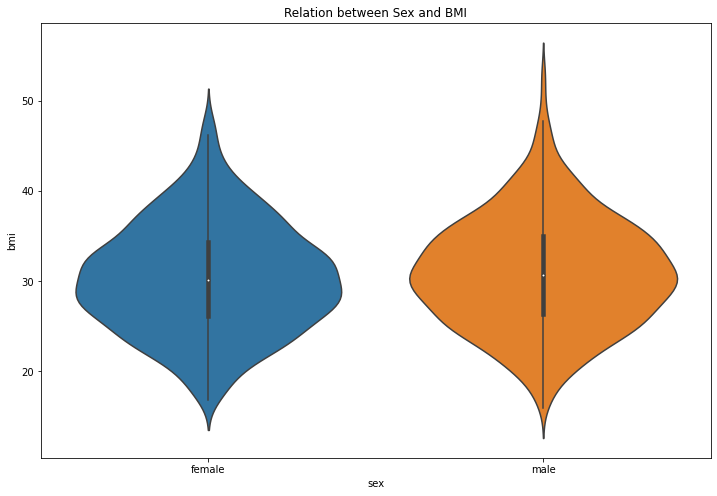

In [30]:
plt.figure(figsize=(12,8))
plt.title("Relation between Sex and BMI")
sns.violinplot(data=df_train, x='sex', y='bmi')
plt.show()

##### The BMI tends to be lower for females as compared to males.

## Encoding the categorical variables

In [31]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df_train['smoker'] = le.fit_transform(df_train['smoker'])

In [32]:
df_train['sex'] = le.fit_transform(df_train['sex'])

In [33]:
df_train['region'] = le.fit_transform(df_train['region'])

In [34]:
df_train.corr()['charges'].sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

 We can observe that almost all the features are lightly correlated with target variable except smoker.

### correlation between different features

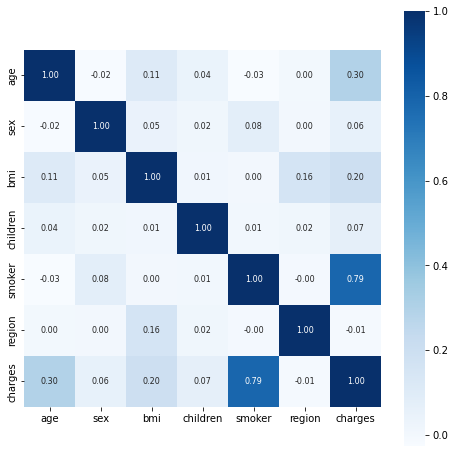

In [35]:
correlation = df_train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

From the heatmap we can say that if the person smokes or not will affect the cost of insurance.

### Removing target feature

In [36]:
target = df_train['charges']

In [37]:
df_train=df_train.drop('charges', axis=1)

## Train and Spliting the data

In [38]:
X = df_train
y = target 

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_pred, y_train, y_pred = train_test_split(X,y, test_size=0.2)

In [40]:
print('X_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('X_pred shape', x_pred.shape)
print('y_pred shape', y_pred.shape)

X_train shape (1069, 6)
y_train shape (1069,)
X_pred shape (268, 6)
y_pred shape (268,)


#  Applying models

In [41]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

### LinearRegression

In [42]:
lr = LinearRegression()     
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_pred)

In [43]:
print(f"R2 Score: {round(r2_score(y_pred, lr_pred), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, lr_pred), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, lr_pred), 2)}")

R2 Score: 0.73
MSE     : 32005385.16
MAE     : 3949.74


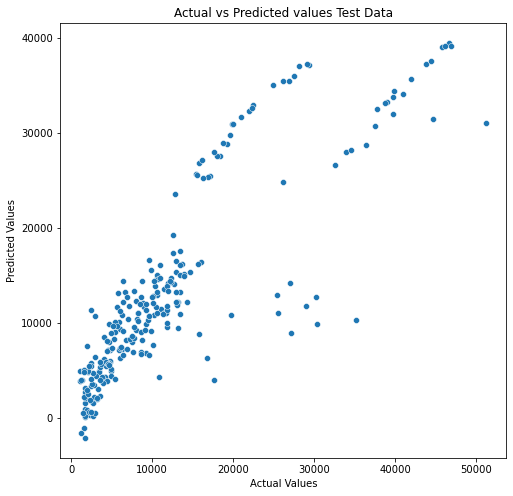

In [44]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_pred, y = lr_pred)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### DecisionTreeRegressor

In [45]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_pred)

In [46]:
print(f"R2 Score: {round(r2_score(y_pred, dt_pred), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, dt_pred), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, dt_pred), 2)}")

R2 Score: 0.63
MSE     : 43950289.53
MAE     : 2925.34


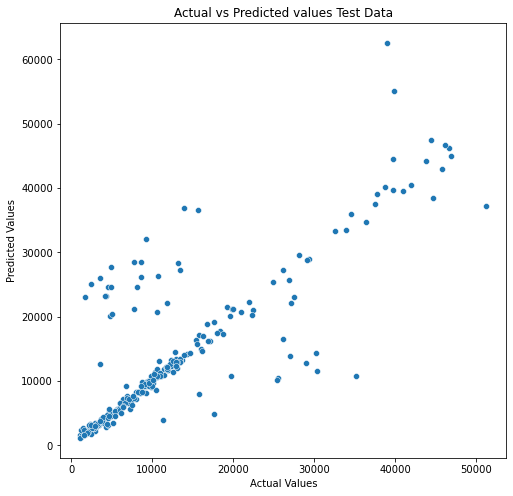

In [47]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_pred, y = dt_pred)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### XGBRegressor

In [48]:
from xgboost import XGBRegressor

xgb =  XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_pred)

In [49]:
print(f"R2 Score: {round(r2_score(y_pred, xgb_pred), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, xgb_pred), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, xgb_pred), 2)}")

R2 Score: 0.8
MSE     : 24548632.16
MAE     : 3034.16


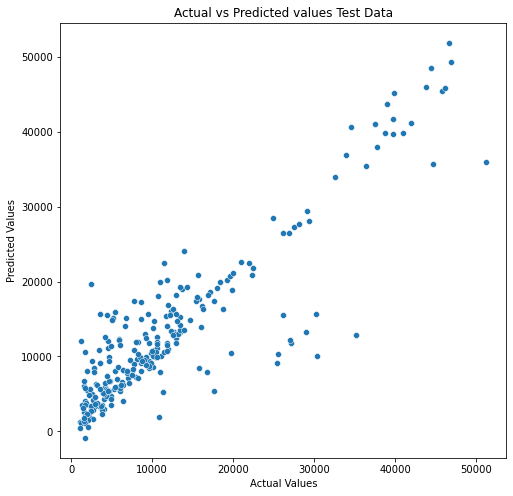

In [50]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_pred, y = xgb_pred)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

### RandomForestRegressor

In [51]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_pred)

In [52]:
print(f"R2 Score: {round(r2_score(y_pred, rf_pred), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, rf_pred), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, rf_pred), 2)}")

R2 Score: 0.83
MSE     : 19962951.9
MAE     : 2646.19


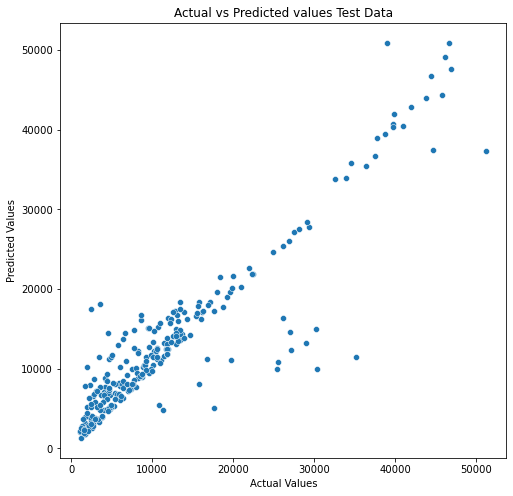

In [53]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_pred, y = rf_pred)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [54]:
# import module
from tabulate import tabulate
 
# assign data
mydata =[ ["LinearRegression",r2_score(y_pred, lr_pred),mean_absolute_error(y_pred, lr_pred)],
    ["DecisionTreeRegression",r2_score(y_pred, dt_pred),mean_absolute_error(y_pred, dt_pred)],
    ["XGBRegressor", r2_score(y_pred, xgb_pred),mean_absolute_error(y_pred, xgb_pred)],
    ["RandomForestRegressor",r2_score(y_pred, rf_pred),mean_absolute_error(y_pred, rf_pred)]
        ]

 
# create header
head = ["Model", "r2_score","mean_squared_error","mean_absolute_error"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
table = pd.DataFrame(mydata)

+------------------------+------------+----------------------+
| Model                  |   r2_score |   mean_squared_error |
+========================+============+======================+
| LinearRegression       |   0.733697 |              3949.74 |
+------------------------+------------+----------------------+
| DecisionTreeRegression |   0.634308 |              2925.34 |
+------------------------+------------+----------------------+
| XGBRegressor           |   0.795741 |              3034.16 |
+------------------------+------------+----------------------+
| RandomForestRegressor  |   0.833897 |              2646.19 |
+------------------------+------------+----------------------+


# k fold cross_validation

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scores_lr = cross_val_score(lr, x_train,y_train, cv=10,scoring = 'r2')
scores_dt = cross_val_score(dt, x_train,y_train, cv=10,scoring = 'r2')
scores_xgb = cross_val_score(xgb, x_train,y_train, cv=10,scoring = 'r2')
scores_rf = cross_val_score(rf, x_train,y_train, cv=10,scoring = 'r2')

In [57]:
print("LinearRegression       CV    : " , scores_lr.mean())
print("DecisionTreeRegression CV    : " , scores_dt.mean())
print("XGBRegressor           CV    : " , scores_xgb.mean())
print("RandomForestRegressor  CV    : " , scores_rf.mean())

LinearRegression       CV    :  0.7353417685643797
DecisionTreeRegression CV    :  0.650119746933247
XGBRegressor           CV    :  0.7956056349448601
RandomForestRegressor  CV    :  0.8260431254381


In [58]:
# import module
from tabulate import tabulate
 
# assign data
mydata_1 =[ ["LinearRegression",r2_score(y_pred, lr_pred),scores_lr.mean()],
    ["DecisionTreeRegression",r2_score(y_pred, dt_pred),scores_dt.mean()],
    ["XGBRegressor", r2_score(y_pred, xgb_pred),scores_xgb.mean()],
    ["RandomForestRegressor",r2_score(y_pred, rf_pred),scores_rf.mean()]
        ]

 
# create header
head = ["Model", "r2_score","r2_score_cv"]
 
# display table
print(tabulate(mydata_1, headers=head, tablefmt="grid"))
table = pd.DataFrame(mydata_1)

+------------------------+------------+---------------+
| Model                  |   r2_score |   r2_score_cv |
+========================+============+===============+
| LinearRegression       |   0.733697 |      0.735342 |
+------------------------+------------+---------------+
| DecisionTreeRegression |   0.634308 |      0.65012  |
+------------------------+------------+---------------+
| XGBRegressor           |   0.795741 |      0.795606 |
+------------------------+------------+---------------+
| RandomForestRegressor  |   0.833897 |      0.826043 |
+------------------------+------------+---------------+


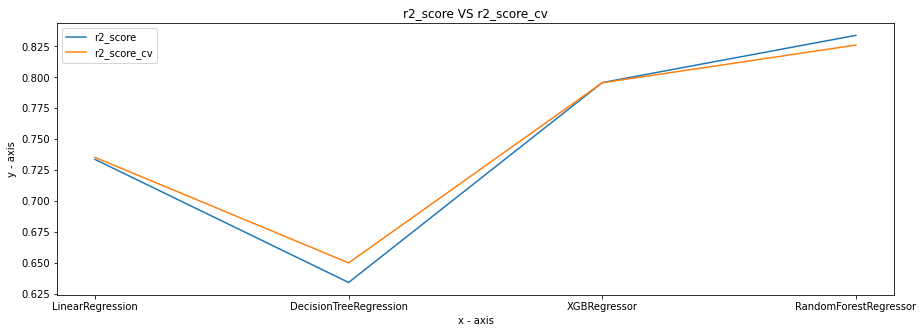

In [59]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(table[0],table[1], label = "r2_score")
plt.plot(table[0],table[2], label = "r2_score_cv")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('r2_score VS r2_score_cv')
plt.legend()
plt.show()

## finding the best hyperparameter using GRID Search CV For RandomForestRegressor

In [60]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf_clf = RandomForestRegressor()

In [63]:
para_rf = {'criterion':['squared_error', 'absolute_error', 'poisson'],'max_depth':np.arange(1, 50),
           'min_samples_leaf':[1,2,4,5,10,20,30,40],
           'max_features': ['sqrt', 'log2'],'ccp_alpha': [0.1, .01, .001]}
grid_rf = GridSearchCV(rf_clf, param_grid=para_rf, cv=5)

In [64]:
grid_rf.fit(x_train, y_train)
 
print("parameters for RandomForest:", grid_rf.best_params_)

parameters for RandomForest: {'ccp_alpha': 0.1, 'criterion': 'absolute_error', 'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1}


In [65]:
rf_1 = RandomForestRegressor(criterion= 'absolute_error', max_depth= 9, min_samples_leaf=1, ccp_alpha= 0.1, max_features ='log2')

In [66]:
rf_1.fit(x_train, y_train)
pred_clf = rf_1.predict(x_pred)

In [81]:
print(f"R2 Score: {round(r2_score(y_pred, pred_clf),2 )}")
print(f"MSE     : {round(mean_squared_error(y_pred, pred_clf),2 )}")
print(f"MAE     : {round(mean_absolute_error(y_pred, pred_clf),2 )}")

R2 Score: 0.87
MSE     : 15838355.64
MAE     : 2287.72


In [83]:
print(f"RandomForestRegressor            : {round(r2_score(y_pred, rf_pred), 2)}")
print(f"RandomForestRegressor_CV         : {round(scores_rf.mean(), 2)}")
print(f"RandomForestRegressor_Tuning     : {round(r2_score(y_pred, pred_clf), 2)}")                                   

RandomForestRegressor            : 0.83
RandomForestRegressor_CV         : 0.83
RandomForestRegressor_Tuning     : 0.87
